In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


In [51]:
california_house = fetch_california_housing()

In [52]:
x_train_all, x_test, y_train_all, y_test = train_test_split(california_house.data, california_house.target)

In [53]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all)

In [54]:
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [55]:
sc = StandardScaler()
x_train_norm = sc.fit_transform(x_train)
x_valid_norm = sc.transform(x_valid)
x_test_norm = sc.transform(x_test)

In [56]:
model1 = keras.models.Sequential([
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)
])

In [57]:
model1.compile(loss='mean_squared_error', optimizer='sgd', metrics=['mean_absolute_error'])

In [58]:
run_model = model1.fit(x_train_norm, y_train, epochs=40, validation_data=(x_valid_norm, y_valid))

Epoch 1/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.4732 - mean_absolute_error: 0.8599 - val_loss: 0.5485 - val_mean_absolute_error: 0.5467
Epoch 2/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5019 - mean_absolute_error: 0.5133 - val_loss: 0.4718 - val_mean_absolute_error: 0.4957
Epoch 3/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4706 - mean_absolute_error: 0.4950 - val_loss: 0.4428 - val_mean_absolute_error: 0.4820
Epoch 4/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4218 - mean_absolute_error: 0.4610 - val_loss: 0.4229 - val_mean_absolute_error: 0.4663
Epoch 5/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4304 - mean_absolute_error: 0.4690 - val_loss: 0.4028 - val_mean_absolute_error: 0.4436
Epoch 6/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4131 - mean_absolute_error: 0.4518 - val_loss: 0.3920 - val_mean_absolute_error: 0.4385
Epoch 7/40
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3715 - mean_absolute_error: 0.4331 - v

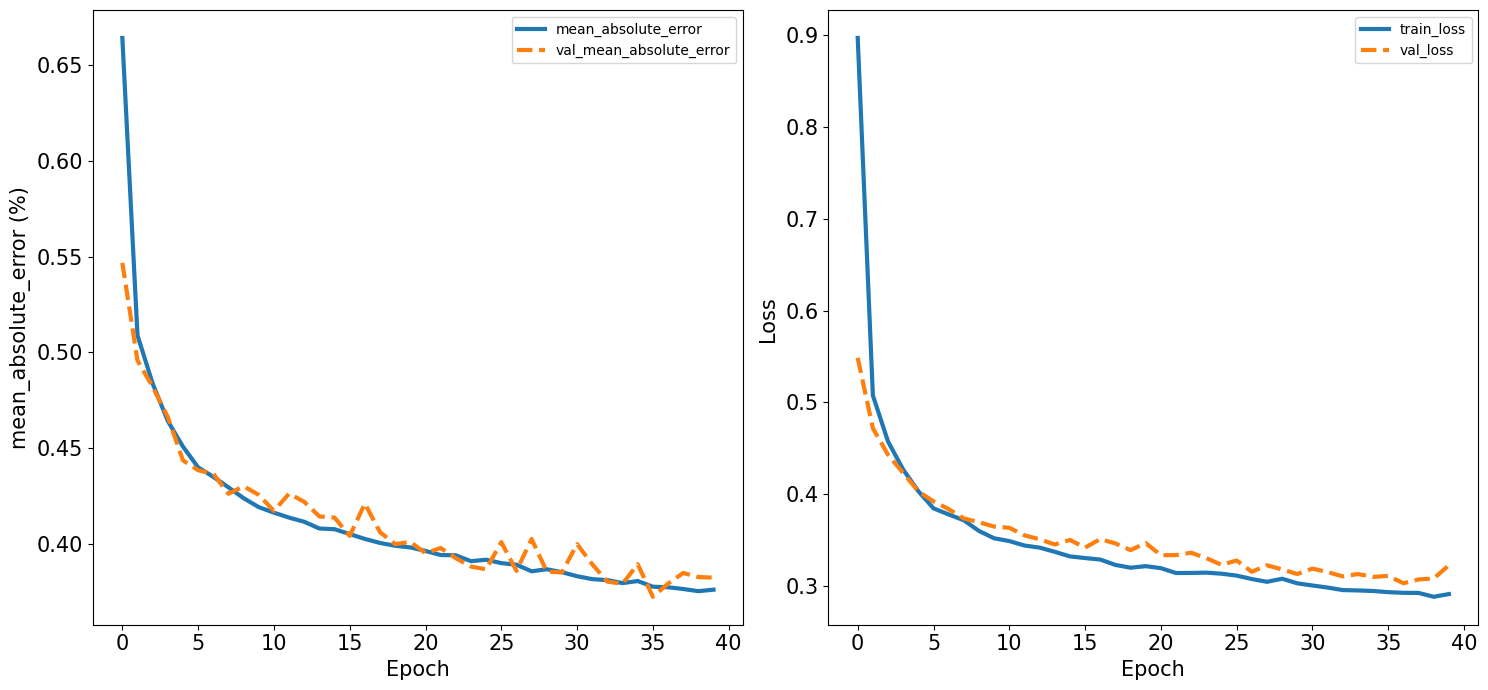

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # Adjust figsize as needed
ax1.plot(run_model.history["mean_absolute_error"], label="mean_absolute_error", lw = 3, linestyle ='-')
ax1.plot(run_model.history["val_mean_absolute_error"], label="val_mean_absolute_error", lw = 3, linestyle ='--')
ax1.set_ylabel('mean_absolute_error (%)', fontsize=15)
ax1.set_xlabel('Epoch', fontsize=15)
ax1.legend()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.plot(run_model.history["loss"], label="train_loss", lw = 3, linestyle ='-')
ax2.plot(run_model.history["val_loss"], label="val_loss", lw = 3, linestyle ='--')
ax2.set_ylabel('Loss ', fontsize=15)
ax2.set_xlabel('Epoch', fontsize=15)
ax2.legend()
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
